#### A6 – MORPHOLOGICAL OPERATIONS

Andeo, Lovely\
2020-05405\
FX-2

**Short Exercise**

First is to input all the necesssary libraries and packages needed.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import math
from matplotlib.image import imread
from skimage.io import imread, imshow
import numpy as np
import cv2
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.color import rgb2gray

**Activity 6.1**

The following activity will increase your understanding of set theory and morphological operations. This is the only activity where you need to hand-draw your output. You will need to Predict, Observe, and Explain.

1. On a piece of graphing paper draw the following shapes:\
a. A 5x5 square\
b. A hollow 10 x10 square, 2 boxes thick\
c. A plus sign, one box thick, 5 boxes along each line\
d. A dumbbell – two 5x5 squares connected by a 3x1 line
2. Draw the resulting image if the following structuring elements are used to (a) ERODE and (B) dilate the images above. Scan your hand-drawn predictions and paste in your slide reports.\
a. 2x2 ones. Origin is the upper left box.\
b. 2x1 ones. Origin is leftmost box.\
c. A 5x5 square. Origin is at the center of the pattern.
3. Validate your predictions in MATLAB. Generate your test images as an array. Use the strel function to create the structuring elements. Use the functions, imerode and imdilate to perform erosion and dilation.
4. Comment on how well you predicted the results of the morphological operation.


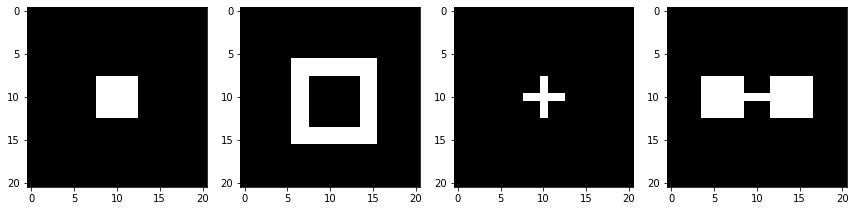

In [105]:
# Create the shape arrays
square = np.zeros((21, 21),dtype=np.uint8)
square[8:13, 8:13] = 1

hollow = np.zeros((21, 21))
hollow[6:16, 6:16] = 1
hollow[8:14, 8:14] = 0

plus = np.zeros((21, 21),dtype=np.uint8)
plus[10-5//2:10+5//2+1, 10] = 1
plus[10, 10-5//2:10+5//2+1] = 1

dumbbell = np.zeros((21, 21),dtype=np.uint8)
dumbbell[10, 10 - 3 // 2:10 + 3 // 2 + 1] = 1
dumbbell[10 - 5 // 2:10 + 5 // 2 + 1, 10 - 5 - 3 // 2:10 - 3 // 2] = 1
dumbbell[10 - 5 // 2:10 + 5 // 2 + 1, 10 + 3 // 2 + 1:10 + 3 // 2 + 1 + 5] = 1

# Create a figure with subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

axs[0].imshow(square, cmap='gray')
axs[1].imshow(hollow, cmap='gray')
axs[2].imshow(plus, cmap='gray')
axs[3].imshow(dumbbell, cmap='gray')
plt.tight_layout()

# Show the figure
plt.show()


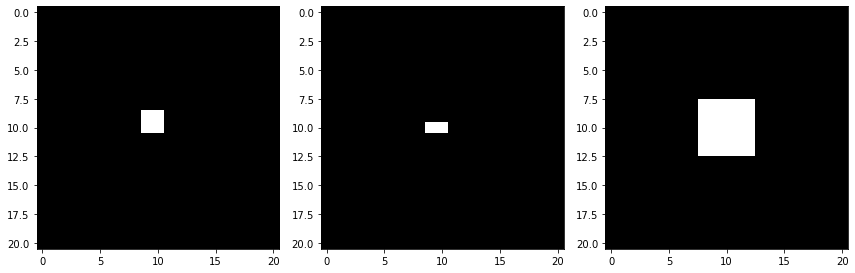

In [102]:
# Create the structuring element arrays
se1 = np.zeros((21, 21),dtype=np.uint8)
se1[9:11,  9:11] = 1

se2 = np.zeros((21, 21),dtype=np.uint8)
se2[10, 9:11] = 1

se3 = np.zeros((21, 21),dtype=np.uint8)
se3[10 - 5 // 2:10 + 5 // 2 + 1,
      10 - 5 // 2:10 + 5 // 2 + 1] = 1

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(se1, cmap='gray')
axs[1].imshow(se2, cmap='gray')
axs[2].imshow(se3, cmap='gray')
plt.tight_layout()

# Show the figure
plt.show()


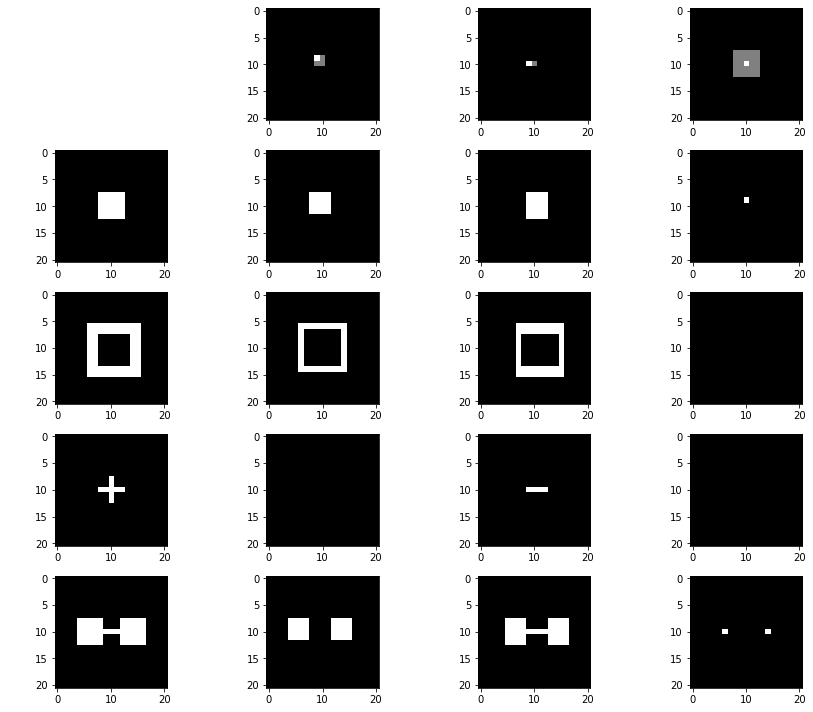

In [118]:
# Create a 5x4 grid of subplots
fig, axs = plt.subplots(5, 4, figsize=(12, 10))

axs[0, 0].axis('off')

axs[1, 0].imshow(square, cmap='gray')
axs[2, 0].imshow(hollow, cmap='gray')
axs[3, 0].imshow(plus, cmap='gray')
axs[4, 0].imshow(dumbbell, cmap='gray')

eroded_square_se1 = cv2.erode(square, se1, anchor=(9,9))
axs[1, 1].imshow(eroded_square_se1, cmap='gray')
eroded_hollow_se1 = cv2.erode(hollow, se1, anchor=(9,9))
axs[2, 1].imshow(eroded_hollow_se1, cmap='gray')
eroded_plus_se1 = cv2.erode(plus, se1, anchor=(9,9))
axs[3, 1].imshow(eroded_plus_se1, cmap='gray')
eroded_dumbbell_se1 = cv2.erode(dumbbell, se1, anchor=(9,9))
axs[4, 1].imshow(eroded_dumbbell_se1, cmap='gray')

eroded_square_se2 = cv2.erode(square, se2, anchor=(10,10))
axs[1, 2].imshow(eroded_square_se2, cmap='gray')
eroded_hollow_se2 = cv2.erode(hollow, se2, anchor=(10,10))
axs[2, 2].imshow(eroded_hollow_se2, cmap='gray')
eroded_plus_se2 = cv2.erode(plus, se2, anchor=(10,10))
axs[3, 2].imshow(eroded_plus_se2, cmap='gray')
eroded_dumbbell_se2 = cv2.erode(dumbbell, se2, anchor=(10,10))
axs[4, 2].imshow(eroded_dumbbell_se2, cmap='gray')

eroded_square_se3 = cv2.erode(square, se3, anchor=(10,9))
axs[1, 3].imshow(eroded_square_se3, cmap='gray')
eroded_hollow_se3 = cv2.erode(hollow, se3, anchor=(10,10))
axs[2, 3].imshow(eroded_hollow_se3, cmap='gray')
eroded_plus_se3 = cv2.erode(plus, se3, anchor=(10,10))
axs[3, 3].imshow(eroded_plus_se3, cmap='gray')
eroded_dumbbell_se3 = cv2.erode(dumbbell, se3, anchor=(10,10))
axs[4, 3].imshow(eroded_dumbbell_se3, cmap='gray')

se1[9,9] = 2
se2[10, 9] = 2
se3[10, 10] = 2
axs[0, 1].imshow(se1, cmap='gray')
axs[0, 2].imshow(se2, cmap='gray')
axs[0, 3].imshow(se3, cmap='gray')

plt.tight_layout()

# Show the plot

plt.show()


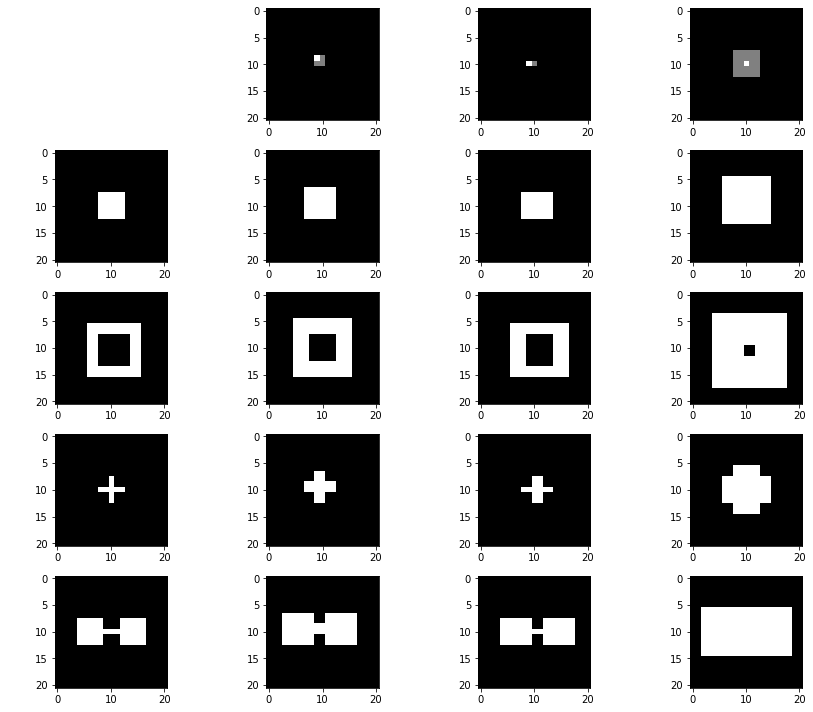

In [120]:
# Create a 5x4 grid of subplots
fig, axs = plt.subplots(5, 4, figsize=(12, 10))

axs[0, 0].axis('off')

axs[1, 0].imshow(square, cmap='gray')
axs[2, 0].imshow(hollow, cmap='gray')
axs[3, 0].imshow(plus, cmap='gray')
axs[4, 0].imshow(dumbbell, cmap='gray')

dilated_square_se1 = cv2.dilate(square, se1, anchor=(9,9))
axs[1, 1].imshow(dilated_square_se1, cmap='gray')
dilated_hollow_se1 = cv2.dilate(hollow, se1, anchor=(9,9))
axs[2, 1].imshow(dilated_hollow_se1, cmap='gray')
dilated_plus_se1 = cv2.dilate(plus, se1, anchor=(9,9))
axs[3, 1].imshow(dilated_plus_se1, cmap='gray')
dilated_dumbbell_se1 = cv2.dilate(dumbbell, se1, anchor=(9,9))
axs[4, 1].imshow(dilated_dumbbell_se1, cmap='gray')

dilated_square_se2 = cv2.dilate(square, se2, anchor=(10,10))
axs[1, 2].imshow(dilated_square_se2, cmap='gray')
dilated_hollow_se2 = cv2.dilate(hollow, se2, anchor=(10,10))
axs[2, 2].imshow(dilated_hollow_se2, cmap='gray')
dilated_plus_se2 = cv2.dilate(plus, se2, anchor=(10,10))
axs[3, 2].imshow(dilated_plus_se2, cmap='gray')
dilated_dumbbell_se2 = cv2.dilate(dumbbell, se2, anchor=(10,10))
axs[4, 2].imshow(dilated_dumbbell_se2, cmap='gray')

dilated_square_se3 = cv2.dilate(square, se3, anchor=(10,9))
axs[1, 3].imshow(dilated_square_se3, cmap='gray')
dilated_hollow_se3 = cv2.dilate(hollow, se3, anchor=(10,10))
axs[2, 3].imshow(dilated_hollow_se3, cmap='gray')
dilated_plus_se3 = cv2.dilate(plus, se3, anchor=(10,10))
axs[3, 3].imshow(dilated_plus_se3, cmap='gray')
dilated_dumbbell_se3 = cv2.dilate(dumbbell, se3, anchor=(10,10))
axs[4, 3].imshow(dilated_dumbbell_se3, cmap='gray')

se1[9,9] = 2
se2[10, 9] = 2
se3[10, 10] = 2
axs[0, 1].imshow(se1, cmap='gray')
axs[0, 2].imshow(se2, cmap='gray')
axs[0, 3].imshow(se3, cmap='gray')

plt.tight_layout()

# Show the plot

plt.show()


**Activity 6.2**

Morphological operations are ideal for cleaning up binary images in preparation for feature extraction. After segmentation, it may happen that apart from the regions of interest, there may be several pixels that light up because they satisfy your thresholding conditions.

1. Open the image malaria(1).jpeg and convert to grayscale.
2. Display its grayscale histogram and decide on a threshold to isolate the cells.
3. Try different morphological operations to remove the small “dusts”. Here are several examples.

Text(0.5, 1.0, 'Gray image')

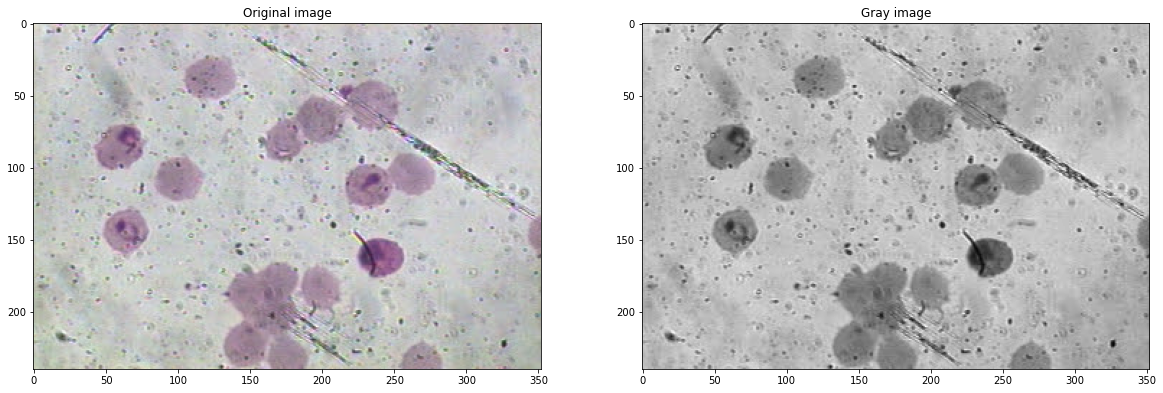

In [19]:
# Loading the grayscale image
I = Image.open('malaria.jpeg')
I_gray = Image.open('malaria.jpeg').convert('L')

fig, axs = plt.subplots(1, 2, figsize=(20, 12))

axs[0].imshow(I)
axs[0].set_title('Original image')

axs[1].imshow(I_gray, cmap='gray')
axs[1].set_title('Gray image')

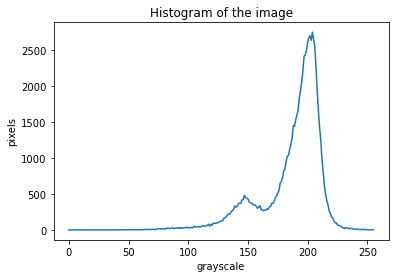

In [13]:
# Calculating the histogram
count, cells = I.histogram(), list(range(256)) # returns list of pixel counts for each intensity level

# Displaying the histogram
plt.plot(cells, count)
plt.xlabel('grayscale')
plt.ylabel('pixels')
plt.title('Histogram of the image')
plt.show()

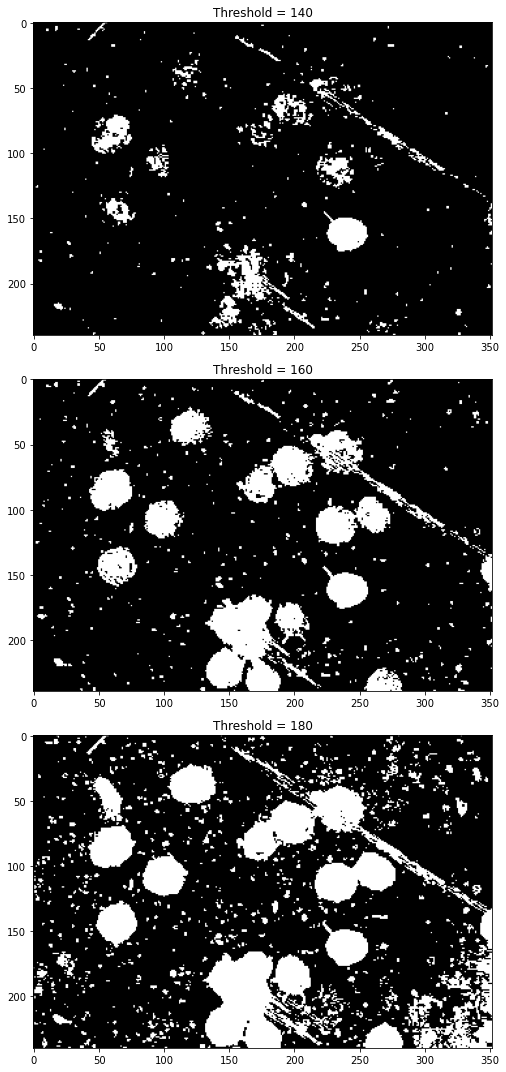

In [17]:
# Defining a list of threshold values to test
thresholds = [140, 160, 180]

# Creating a figure with subplots for each thresholded image
fig, axes = plt.subplots(len(thresholds), 1, figsize=(10, 15))

# Variable to store the thresholded image with threshold of 160
threshold_160 = None

# Looping over the threshold values and display the thresholded images
for i, t in enumerate(thresholds):
    # Thresholding the image
    BW = np.array(I) < t
    
    # Save the thresholded image with threshold of 160
    if t == 160:
        threshold_160 = BW
    
    # Displaying the thresholded image
    axes[i].imshow(BW, cmap='gray')
    axes[i].set_title('Threshold = {}'.format(t))

plt.tight_layout()
plt.show()


In [32]:
element = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]])

def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im
def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im

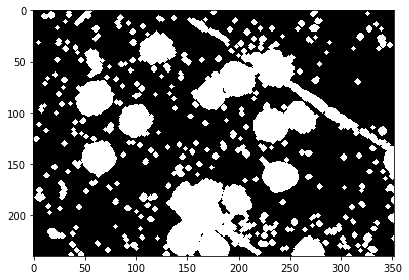

In [35]:
multi_diluted = multi_dil(threshold_160, 2, element)
imshow(multi_diluted)

Text(0.5, 1.0, 'Closed-Opened Image')

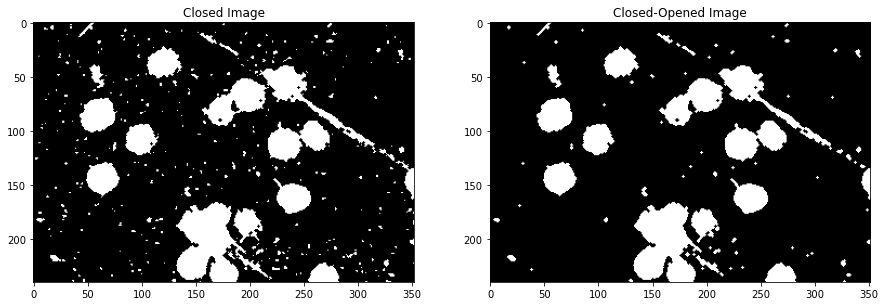

In [33]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(closing(threshold_160, element), cmap="gray")
ax[0].set_title("Closed Image")

ax[1].imshow(opening(closing(threshold_160, element), element), cmap="gray")
ax[1].set_title("Closed-Opened Image")
